In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa.stattools import *
import statsmodels.api as sm
np.set_printoptions(edgeitems=100, linewidth=1000)

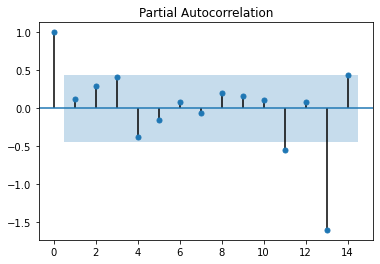

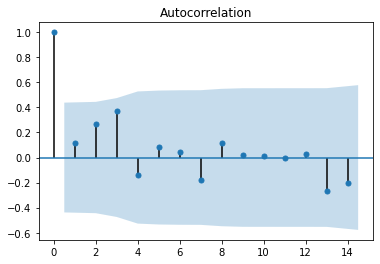

In [2]:
Time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Value = [23.4, 24.1, 44.4, 25.5, 19.2, 37.1, 45.0, 61.8, 56.7, 62.3, 30.9, 69.6, 11.0, 56.6, 83.4, 33.9, 75.5, 87.3, 55.4, 95.2]
df = pd.DataFrame({'Time':Time, 'Value':Value})
df.set_index('Time', inplace=True)

plot_pacf(df['Value'])
plot_acf(df['Value'])
plt.show()

In [124]:
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
Value = [23.4, 24.1, 44.4, 25.5, 19.2, 37.1, 45.0, 61.8, 56.7, 62.3,
         30.9, 69.6, 11.0, 56.6, 83.4, 33.9, 75.5, 87.3, 55.4, 95.2]

acovf = acovf(Value, fft=False, nlag=14)
acf = acf(Value, fft=False, nlags=14)
pacf = pacf(Value, nlags=14)
pd.DataFrame({'acovf':acovf, 'acf':acf, 'pacf':pacf})


,acovf,acf,pacf
0,564.367275,1.000000,1.000000
1,66.302364,0.117481,0.123664
2,151.940127,0.269222,0.288251
3,209.629541,0.371442,0.415350
4,-78.902570,-0.139807,-0.384884
5,45.295894,0.080260,-0.150695
6,22.688408,0.040201,0.080903
7,-99.605754,-0.176491,-0.063174
8,65.153485,0.115445,0.199225
9,10.643849,0.018860,0.165305


In [7]:
from sklearn import linear_model

In [51]:
df = pd.DataFrame({'T i':Value})
df['T (i-1)'] = df['T i'].shift(1)
df['T (i-2)'] = df['T i'].shift(2)
df.dropna(inplace=True)
df.head()

,T i,T (i-1),T (i-2)
2,44.4,24.1,23.4
3,25.5,44.4,24.1
4,19.2,25.5,44.4
5,37.1,19.2,25.5
6,45.0,37.1,19.2


In [52]:
lm = linear_model.LinearRegression()
df_X = df[['T (i-1)']]
df_y = df['T i']
model = lm.fit(df_X, df_y)
df['Predicted T i | T (i-1)'] = lm.predict(df_X)

In [53]:
df['Residual T i | T (i-1)'] = df['T i'] - df['Predicted T i | T (i-1)']
df.head()

,T i,T (i-1),T (i-2),Predicted T i | T (i-1),Residual T i | T (i-1)
2,44.4,24.1,23.4,50.796767,-6.396767
3,25.5,44.4,24.1,52.456559,-26.956559
4,19.2,25.5,44.4,50.911236,-31.711236
5,37.1,19.2,25.5,50.396128,-13.296128
6,45.0,37.1,19.2,51.859688,-6.859688


In [54]:
lm = linear_model.LinearRegression()
df_X = df[['T (i-1)']]
df_y = df['T (i-2)']
model = lm.fit(df_X, df_y)
df['Predicted T (i-2) | T (i-1)'] = lm.predict(df_X)
df['Residual T (i-2) | T (i-1)'] = df['T (i-2)'] - df['Predicted T (i-2) | T (i-1)']
df.head()

,T i,T (i-1),T (i-2),Predicted T i | T (i-1),Residual T i | T (i-1),Predicted T (i-2) | T (i-1),Residual T (i-2) | T (i-1)
2,44.4,24.1,23.4,50.796767,-6.396767,44.112939,-20.712939
3,25.5,44.4,24.1,52.456559,-26.956559,46.556182,-22.456182
4,19.2,25.5,44.4,50.911236,-31.711236,44.281439,0.118561
5,37.1,19.2,25.5,50.396128,-13.296128,43.523191,-18.023191
6,45.0,37.1,19.2,51.859688,-6.859688,45.677578,-26.477578


In [61]:
print(df.corr(method='pearson')['Residual T i | T (i-1)']['Residual T (i-2) | T (i-1)'])

0.3330244334395068


In [59]:
from statsmodels.tsa.stattools import pacf
print(pacf(df['T i'], nlags=2)[2])


0.24629191593566693


In [78]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m')
df = pd.read_csv('../csv/AirPassengers.csv', parse_dates=['Month'], date_parser=d_parser, index_col='Month')
df.head()

c:\users\boonkiat\pycharmprojects\pyshop\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


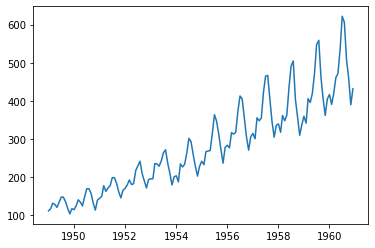

In [80]:
plt.plot(df['#Passengers'])

In [81]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [101]:
dftest = adfuller(df['#Passengers'].values)
print('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print('Reject Ho - Time series is stationary')
else:
    print('Fail to reject Ho - Time series is Non-Stationary')

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Fail to reject Ho - Time series is Non-Stationary


In [104]:
df_T0 = df
df_T1 = df.shift(1)
df_T0.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [105]:
df_T1.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0


In [106]:
diff = df_T0 - df_T1
diff.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [113]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [114]:
difference(df['#Passengers'], interval=1)

0       6
1      14
2      -3
3      -8
4      14
       ..
138   -16
139   -98
140   -47
141   -71
142    42
Length: 143, dtype: int64

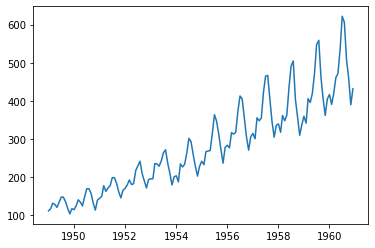

In [116]:
plt.plot(df['#Passengers'])

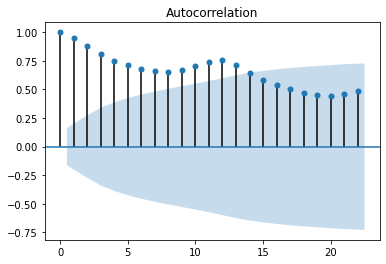

In [123]:
from statsmodels.tsa.stattools import acovf
plot_acf(df['#Passengers'])
# plot_pacf(df['#Passengers'])
plt.show()